# HOUSE PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Delhi_house_data[1].csv")
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [3]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

u = data['Locality']
data['Locality'] = le.fit_transform(u)
data.head()

v = data['Furnishing']
data['Furnishing'] = le.fit_transform(v)
data.head()

x = data['Status']
data['Status'] = le.fit_transform(x)
data.head()

y = data['Transaction']
data['Transaction'] = le.fit_transform(y)
data.head()

z = data['Type']
data['Type'] = le.fit_transform(z)
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,283,1.0,6500000,1,0,1,NaN
1,750.0,2,2.0,1,139,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,49,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,281,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,282,1.0,6200000,1,0,1,6667.0


In [5]:
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,283,1.0,6500000,1,0,1,NaN
1,750.0,2,2.0,1,139,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,49,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,281,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,282,1.0,6200000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,2,44,3.0,55000000,1,0,1,12916.0
1255,1050.0,3,2.0,1,44,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,44,3.0,17500000,1,0,1,12916.0
1257,990.0,2,2.0,2,45,1.0,11500000,1,1,1,12916.0


# Furnishing
0 -> Semi-furnished  
1 -> Furnished  
2 ->Unfurnished

# Transaction 
0 -> New_property  
1 -> Resale

# Status 
0 -> Ready_to_move  
1 -> Almost_ready

# Type
0 ->Builder_Floor  
1 -> Apartment

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1259 non-null   int32  
 4   Locality     1259 non-null   int32  
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   int32  
 8   Transaction  1259 non-null   int32  
 9   Type         1259 non-null   int32  
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int32(5), int64(2)
memory usage: 83.7 KB


In [7]:
data.describe()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1259.000000,1259.000000,1226.000000,1.259000e+03,1259.000000,1259.000000,1259.000000,1018.000000
mean,1466.452724,2.796664,2.556086,1.150913,184.577442,1.935563,2.130670e+07,0.940429,0.620334,0.532963,15690.136542
std,1568.055040,0.954425,1.042220,0.653550,104.355640,6.279212,2.560115e+07,0.236785,0.485497,0.507011,21134.738568
min,28.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+06,0.000000,0.000000,0.000000,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,102.000000,1.000000,5.700000e+06,1.000000,0.000000,0.000000,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,173.000000,1.000000,1.420000e+07,1.000000,1.000000,1.000000,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,277.000000,2.000000,2.550000e+07,1.000000,1.000000,1.000000,18000.000000
max,24300.000000,10.000000,7.000000,3.000000,364.000000,114.000000,2.400000e+08,1.000000,1.000000,2.000000,183333.000000


In [8]:
data.corr()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
Area,1.000000,0.449438,0.535104,-0.005284,0.024540,-0.009297,0.580836,-0.157769,-0.116283,0.089483,0.162832
BHK,0.449438,1.000000,0.773267,-0.108789,0.066992,-0.070707,0.571523,-0.120472,-0.137574,0.112424,0.181540
Bathroom,0.535104,0.773267,1.000000,-0.029875,0.023583,-0.032796,0.728108,-0.142796,-0.196926,0.130895,0.219169
Furnishing,-0.005284,-0.108789,-0.029875,1.000000,-0.024578,0.073568,0.014572,-0.054868,-0.029721,0.040152,0.005252
Locality,0.024540,0.066992,0.023583,-0.024578,1.000000,0.008748,0.045160,-0.090484,-0.039240,0.059774,-0.003796
Parking,-0.009297,-0.070707,-0.032796,0.073568,0.008748,1.000000,-0.000448,0.016637,0.034701,-0.074525,0.001607
Price,0.580836,0.571523,0.728108,0.014572,0.045160,-0.000448,1.000000,-0.186129,-0.218234,0.107621,0.322859
Status,-0.157769,-0.120472,-0.142796,-0.054868,-0.090484,0.016637,-0.186129,1.000000,0.259478,0.032923,-0.022153
Transaction,-0.116283,-0.137574,-0.196926,-0.029721,-0.039240,0.034701,-0.218234,0.259478,1.000000,-0.217154,-0.031871
Type,0.089483,0.112424,0.130895,0.040152,0.059774,-0.074525,0.107621,0.032923,-0.217154,1.000000,0.094777


In [9]:
import seaborn as sns

<Axes: >

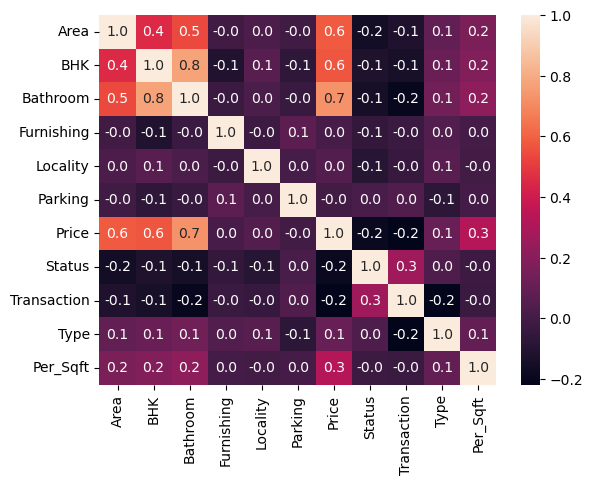

In [10]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f')

<Axes: xlabel='BHK', ylabel='count'>

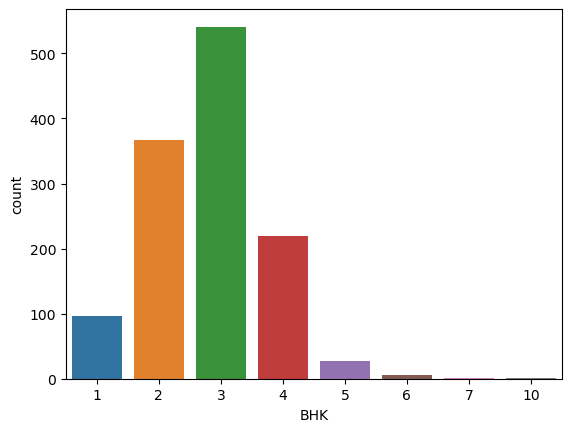

In [11]:
sns.countplot(data=data,x="BHK")

<Axes: xlabel='Bathroom', ylabel='count'>

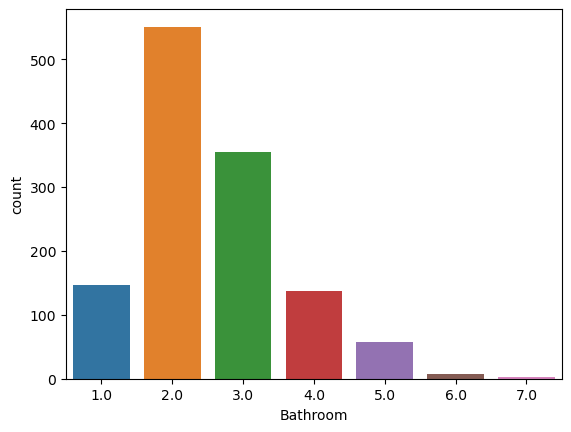

In [12]:
sns.countplot(data=data,x="Bathroom")

<Axes: xlabel='Parking', ylabel='count'>

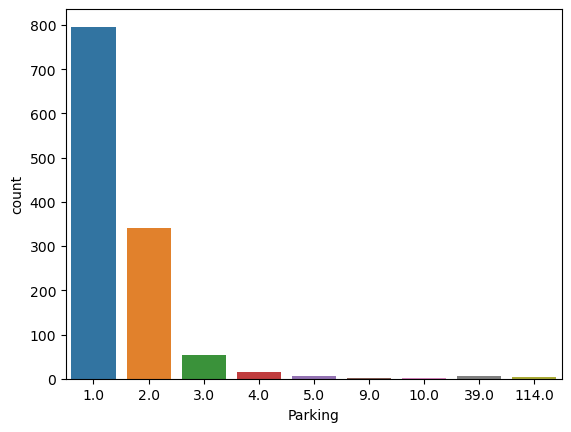

In [13]:
sns.countplot(data=data,x="Parking")

<Axes: xlabel='Status', ylabel='count'>

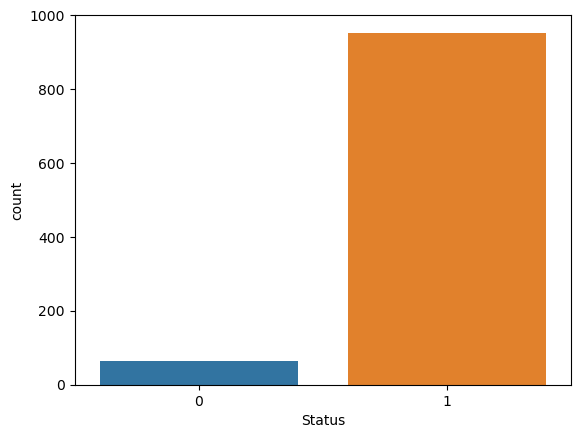

In [57]:
sns.countplot(data=data,x="Status")

<Axes: xlabel='Area', ylabel='Price'>

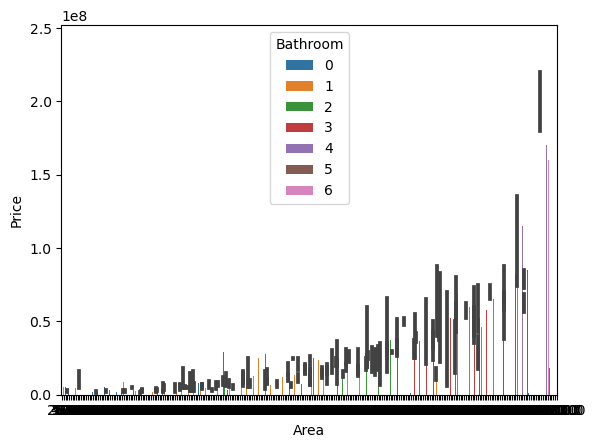

In [50]:
sns.barplot(data=data,x="Area",y="Price",hue="Bathroom")

<Axes: xlabel='Area', ylabel='Price'>

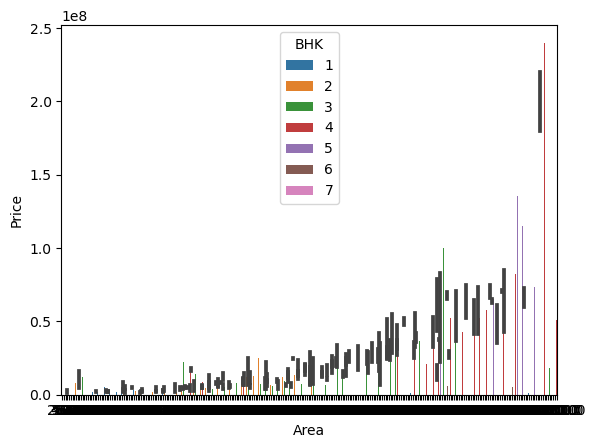

In [51]:
sns.barplot(data=data,x="Area",y="Price",hue="BHK")

<Axes: xlabel='Area', ylabel='Price'>

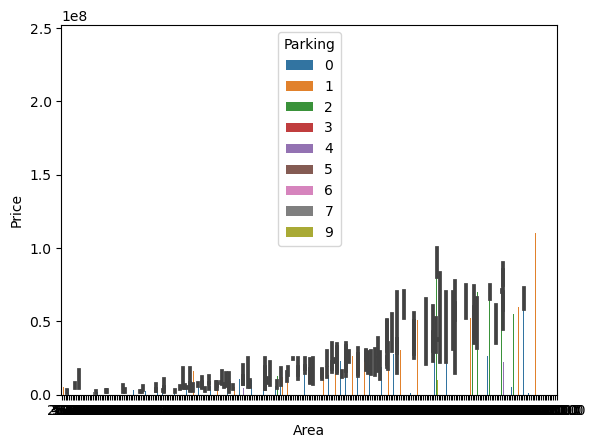

In [52]:
sns.barplot(data=data,x="Area",y="Price",hue="Parking")

<Axes: xlabel='Parking', ylabel='Price'>

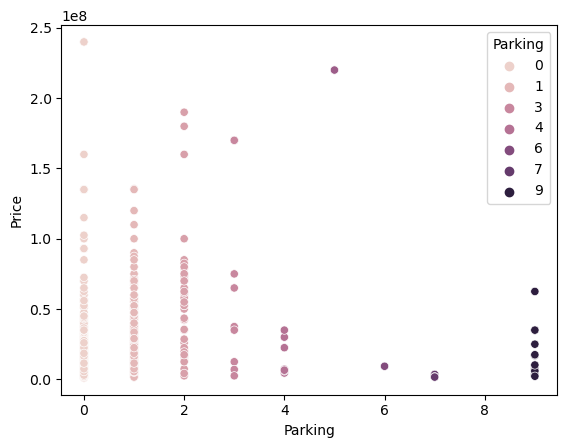

In [53]:
sns.scatterplot(data=data,x="Parking",y="Price",hue="Parking")

<Axes: xlabel='Area', ylabel='Price'>

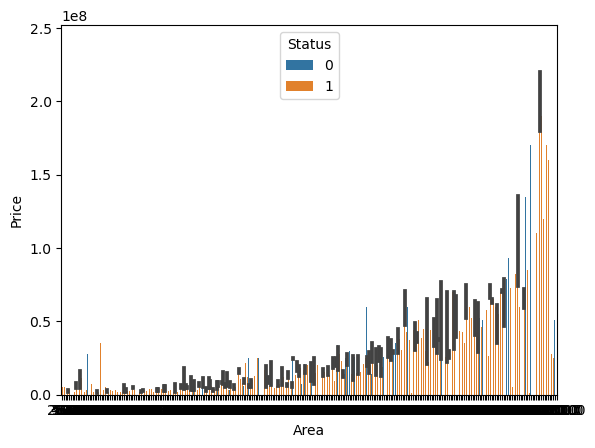

In [54]:
sns.barplot(data=data,x="Area",y="Price",hue="Status")

<Axes: xlabel='Area', ylabel='Price'>

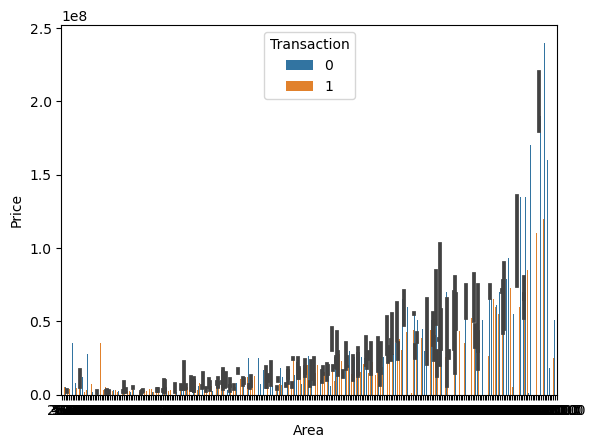

In [55]:
sns.barplot(data=data,x="Area",y="Price",hue="Transaction")

<Axes: xlabel='Area', ylabel='Price'>

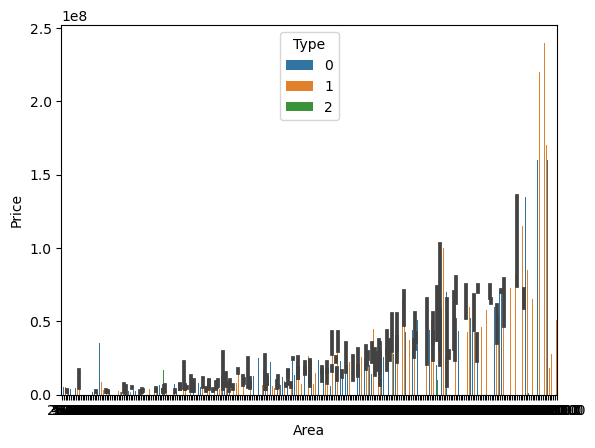

In [56]:
sns.barplot(data=data,x="Area",y="Price",hue="Type")

<Axes: xlabel='Furnishing', ylabel='Price'>

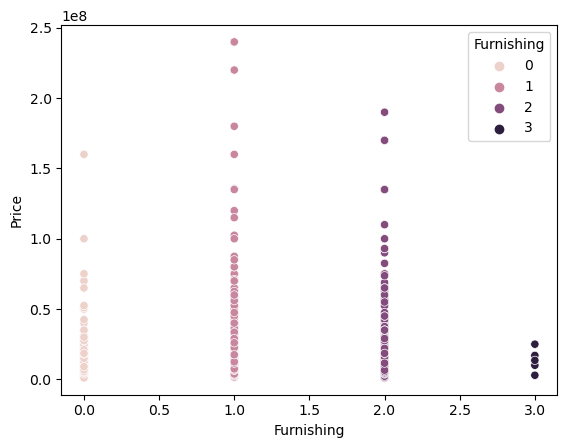

In [22]:
sns.scatterplot(data=data,x="Furnishing",y="Price",hue="Furnishing")

In [23]:
data.shape

(1259, 11)

<Axes: ylabel='Bathroom'>

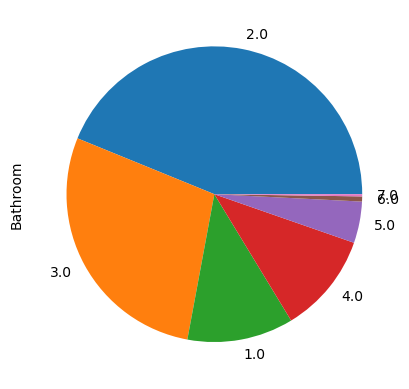

In [24]:
df=data["Bathroom"].value_counts()
df.plot(kind='pie')

<Axes: ylabel='Parking'>

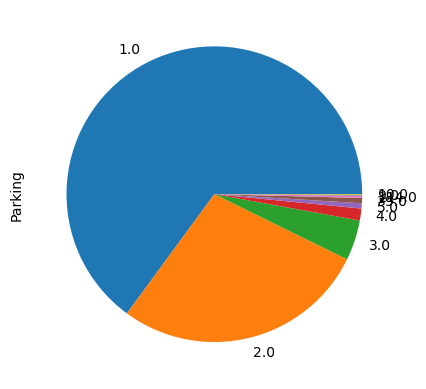

In [25]:
df=data["Parking"].value_counts()
df.plot(kind='pie')

In [26]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [27]:


data["Bathroom"]=LE.fit_transform(data["Bathroom"])
data["Parking"]=LE.fit_transform(data["Parking"])

In [28]:
data.dropna(inplace=True)
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,1,1,139,0,5000000,1,0,0,6667.0
2,950.0,2,1,0,49,0,15500000,1,1,0,6667.0
3,600.0,2,1,1,281,0,4200000,1,1,1,6667.0
4,650.0,2,1,1,282,0,6200000,1,0,1,6667.0
5,1300.0,4,2,1,281,0,15500000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,4,2,44,2,55000000,1,0,1,12916.0
1255,1050.0,3,1,1,44,2,12500000,1,1,1,12916.0
1256,875.0,3,2,1,44,2,17500000,1,0,1,12916.0
1257,990.0,2,1,2,45,0,11500000,1,1,1,12916.0


In [29]:
x=data.drop("Price",axis=1)
x
y=data.Price

In [30]:
x.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
1,750.0,2,1,1,139,0,1,0,0,6667.0
2,950.0,2,1,0,49,0,1,1,0,6667.0
3,600.0,2,1,1,281,0,1,1,1,6667.0
4,650.0,2,1,1,282,0,1,0,1,6667.0
5,1300.0,4,2,1,281,0,1,0,1,6667.0


In [31]:
y.head()

1     5000000
2    15500000
3     4200000
4     6200000
5    15500000
Name: Price, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((814, 10), (204, 10), (814,), (204,))

In [33]:
ytrain.head()

1046    24500000
477     22500000
187     11500000
659     62500000
393      3300000
Name: Price, dtype: int64

In [34]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [35]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [36]:
ypred=lr.predict(xtest)
ypred[:5]

array([29833804.6842133 , 33673641.3564235 , 28409318.65733393,
        4220589.19413644,  1766913.91580399])

In [37]:
ytest[:5]

506    30000000
822     6000000
615    23100000
155     1650000
355    16000000
Name: Price, dtype: int64

In [38]:
lr.score(xtest,ytest)

0.5506100741913111

In [39]:
import pickle as pkl
filename = "save_model.sav"
pkl.dump(lr, open(filename, 'wb'))

In [40]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pickle as pkl
filename="data.sav"
pkl.dump(lr,open(filename,'bw'))

In [42]:
loaded_model=pkl.load(open(filename,'br'))
loaded_model

LinearRegression()

In [43]:
import gradio as gr

In [44]:
def Price(Area, BHK,Bathroom , Furnishing, Locality,Parking,
Status,Transaction,Type,Per_Sqft):
        x = np.array([Area, BHK,Bathroom , Furnishing, Locality,Parking,
Status,Transaction,Type,Per_Sqft])
        x = np.array(x).reshape(1,-1)
 #df = sc.transform(df)
        prediction = lr.predict(x)
        prediction = int(prediction)
        return prediction

In [45]:
  # Make sure to import the necessary library

app = gr.Interface(
    fn=Price,  # Make sure Price is a correctly defined function
    inputs=[
        gr.inputs.Number(label="Area"),
       gr.inputs.Number(label="BHK"),
        gr.inputs.Number(label="Bathroom"),
         gr.inputs.Radio(choices=[3, 2, 1, 0], optional=bool, label="Furnishing"),
        gr.inputs.Number(label="Locality"),
        gr.inputs.Number(label="Parking"),
        gr.inputs.Radio(choices=[1, 0], optional=bool, label="Status"),
        gr.inputs.Radio(choices=[1, 0], optional=bool, label="Transaction"),
        gr.inputs.Radio(choices=[1, 0], optional=bool, label="Type"),
        
        gr.inputs.Number(label="Per_Sqft"),
        
    ],
    outputs="label",
    title="Developing an ML Model for Expenses prediction"
)


C:\Users\raksh\anaconda3\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\raksh\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\raksh\anaconda3\lib\site-packages\gradio\inputs.py:183: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(


In [58]:
app.launch(show_error=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\raksh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
app.close()

Closing server running on port: 7860


In [48]:
filename = "save_model.sav"
pkl.dump(lr, open(filename, 'wb'))